# Virtual inertia scheduling

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scienceplots

import andes
import ams

import ams.benchmarks as bp

# Configure logger
andes.config_logger(stream_level=30)
ams.config_logger(stream_level=20)

# Display tool versions
_ = bp.get_tool_versions()

import matplotlib.pyplot as plt
import scienceplots

Last run time: 2024-11-05 18:47:43
Python: 3.10.0 | packaged by conda-forge | (default, Nov 20 2021, 02:27:15) [Clang 11.1.0 ]

Tool        Version                
----------  -----------------------
ltbams      0.9.10.post18+g43b7dbe3
cvxpy       1.5.3                  
pandapower  2.14.11                
PYPOWER     5.1.17                 
gurobipy    11.0.3                 
mosek       10.2.6                 
ecos        2.0.14                 
scs         3.2.7                  
piqp        0.4.2                  
numba       0.60.0                 


In [2]:
%matplotlib inline

## Import cases

- Case1; no IBR: sp1, sa1
- Case2; IBR, no VIS: sp2, sa2
- Case3; IBR, VIS: sp3, sa3

In [3]:
sp1 = ams.load('./ieee39_uced.xlsx',
               setup=True,
               default=True,
               no_output=True)

sp2 = ams.load('./ieee39_uced_vis.xlsx',
               setup=True,
               default_config=True,
               no_output=True,)

sp3 = ams.load('./ieee39_uced_vis.xlsx',
               setup=True,
               default_config=True,
               no_output=True,)

Parsing input file "./ieee39_uced.xlsx"...
Input file parsed in 0.0433 seconds.
System set up in 0.0018 seconds.
Parsing input file "./ieee39_uced_vis.xlsx"...
Input file parsed in 0.0475 seconds.
System set up in 0.0019 seconds.
Parsing input file "./ieee39_uced_vis.xlsx"...
Input file parsed in 0.0454 seconds.
System set up in 0.0019 seconds.


Ensure PFlow models are identical.

In [4]:
for mdl_name in ['Bus', 'Line', 'PQ', 'Shunt', 'Slack', 'PV']:
    mdl_sp1 = sp1.models[mdl_name]
    mdl_sp2 = sp2.models[mdl_name]
    is_equal = mdl_sp1.as_df().equals(mdl_sp2.as_df())
    print(f'{mdl_name}: {is_equal}')

Bus: True
Line: True
PQ: False
Shunt: True
Slack: True
PV: True


## Solve scheduling

In [5]:
sp1.RTED.run(solver='CLARABEL')

Building system matrices
Parsing OModel for <RTED>
Evaluating OModel for <RTED>
Finalizing OModel for <RTED>
<RTED> initialized in 0.0128 seconds.
<RTED> solved as optimal in 0.0127 seconds, converged in 10 iterations with CLARABEL.


True

In [6]:
sp2.RTED.run(solver='CLARABEL')

Building system matrices
Parsing OModel for <RTED>
Evaluating OModel for <RTED>
Finalizing OModel for <RTED>
<RTED> initialized in 0.0417 seconds.
<RTED> solved as optimal in 0.0225 seconds, converged in 10 iterations with CLARABEL.


True

In [7]:
sp3.RTEDVIS.run(solver='CLARABEL')

Building system matrices
Parsing OModel for <RTEDVIS>
Evaluating OModel for <RTEDVIS>
Finalizing OModel for <RTEDVIS>
<RTEDVIS> initialized in 0.0163 seconds.
<RTEDVIS> solved as optimal in 0.0167 seconds, converged in 12 iterations with CLARABEL.


True

In [8]:
# pv_cols = ['idx', 'bus', 'p0', 'v0']
# print(sp1.PV.as_df()[pv_cols])
# print(sp2.PV.as_df()[pv_cols])

DC-AC conversion

In [9]:
sp1.RTED.dc2ac()

Parsing OModel for <ACOPF>
Evaluating OModel for <ACOPF>
Finalizing OModel for <ACOPF>
<ACOPF> initialized in 0.0039 seconds.
<ACOPF> solved in 0.5432 seconds, converged in 41 iterations with PYPOWER-PIPS.
Parsing OModel for <RTED>
<RTED> converted to AC.


True

In [10]:
sp2.RTED.dc2ac()

Parsing OModel for <ACOPF>
Evaluating OModel for <ACOPF>
Finalizing OModel for <ACOPF>
<ACOPF> initialized in 0.0034 seconds.
<ACOPF> solved in 0.5445 seconds, converged in 41 iterations with PYPOWER-PIPS.
Parsing OModel for <RTED>
<RTED> converted to AC.


True

In [11]:
sp3.RTEDVIS.dc2ac()

Parsing OModel for <ACOPF>
Evaluating OModel for <ACOPF>
Finalizing OModel for <ACOPF>
<ACOPF> initialized in 0.0035 seconds.
<ACOPF> solved in 0.5326 seconds, converged in 41 iterations with PYPOWER-PIPS.
Parsing OModel for <RTEDVIS>
<RTEDVIS> converted to AC.


True

Convert to dynamic cases.

In [12]:
sa1 = sp1.to_andes(setup=False, addfile='ieee39_sg.xlsx')

sa2 = sp2.to_andes(setup=False, addfile='ieee39_vis.xlsx')

sa3 = sp3.to_andes(setup=False, addfile='ieee39_vis.xlsx')

Generating code for 1 models on 12 processes.


Parsing additional file "ieee39_sg.xlsx"...
Following PFlow models in addfile will be overwritten: <Bus>, <PQ>, <PV>, <Slack>, <Shunt>, <Line>, <Area>
Addfile parsed in 0.0655 seconds.
System converted to ANDES in 0.2136 seconds.
AMS system 0x1082b9630 is linked to the ANDES system 0x13bfbbd60.
PFlow verification is skipped due to no setup.


Generating code for 1 models on 12 processes.


Parsing additional file "ieee39_vis.xlsx"...
Following PFlow models in addfile will be overwritten: <Bus>, <PQ>, <PV>, <Slack>, <Shunt>, <Line>, <Area>
Addfile parsed in 0.1299 seconds.
System converted to ANDES in 0.1480 seconds.
AMS system 0x1391dfb20 is linked to the ANDES system 0x13bfbbd30.
PFlow verification is skipped due to no setup.


Generating code for 1 models on 12 processes.


Parsing additional file "ieee39_vis.xlsx"...
Following PFlow models in addfile will be overwritten: <Bus>, <PQ>, <PV>, <Slack>, <Shunt>, <Line>, <Area>
Addfile parsed in 0.0671 seconds.
System converted to ANDES in 0.1496 seconds.
AMS system 0x1082dea10 is linked to the ANDES system 0x138ffecb0.
PFlow verification is skipped due to no setup.


In [13]:
# add Alter model as a load change at 1s
for ss in [sa1, sa2, sa3]:
    ss.add(model='Alter', param_dict=dict(t=1, model='PQ', dev='PQ_5', src='Ppf',
                                          attr='v', method='+', amount=3))
    ss.add(model='Alter', param_dict=dict(t=1, model='PQ', dev='PQ_6', src='Ppf',
                                          attr='v', method='+', amount=0))
    ss.setup()

Send dispatch results to dynamic cases.

In [14]:
sp1.dyn.send(adsys=sa1, routine='RTED')

Send <RTED> results to ANDES <0x13bfbbd60>...
*Send <vBus> to StaticGen.v0
Send <vBus> to Bus.v0
Send <ug> to StaticGen.u
Send <pg> to StaticGen.p0


True

In [15]:
sp2.dyn.send(adsys=sa2, routine='RTED')

Send <RTED> results to ANDES <0x13bfbbd30>...
*Send <vBus> to StaticGen.v0
Send <vBus> to Bus.v0
Send <ug> to StaticGen.u
Send <pg> to StaticGen.p0


True

In [16]:
sp3.dyn.send(adsys=sa3, routine='RTEDVIS')

Send <RTEDVIS> results to ANDES <0x138ffecb0>...
*Send <vBus> to StaticGen.v0
Send <vBus> to Bus.v0
Send <ug> to StaticGen.u
Send <pg> to StaticGen.p0
Send <M> to RenGen.M
Send <D> to RenGen.D


True

## Run PFlow

In [17]:
# settings
for ss in [sa1, sa2, sa3]:
    ss.PQ.config.p2p = 1
    ss.PQ.config.q2q = 1
    ss.PQ.config.p2z = 0
    ss.PQ.config.q2z = 0
    ss.PQ.pq2z = 0

    ss.TDS.config.criteria = 0
    ss.TDS.config.tf = 30

In [18]:
sa1.PFlow.run()

True

In [19]:
sa2.PFlow.run()

True

In [20]:
sa3.PFlow.run()

True

## Run TDS

Run PFlow and TDS.

In [21]:
_ = sa1.TDS.init()

GENROU (xl <= xd2) out of typical upper limit.

   idx     | values | limit
-----------+--------+------
 GENROU_1  | 0.012  | 0.001
 GENROU_2  | 0.042  | 0.036
 GENROU_3  | 0.036  | 0.003
 GENROU_4  | 0.025  | 0.001
 GENROU_5  | 0.050  | 0.001
 GENROU_7  | 0.031  | 0.002
 GENROU_8  | 0.029  | 0.006
 GENROU_9  | 0.018  | 0.001
 GENROU_10 | 0.003  | 0.000




In [22]:
sa1.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

<Alter Alter_2>: set PQ.PQ_5.Ppf.v=3.1 at t=1. Previous value was 0.1.
<Alter Alter_3>: set PQ.PQ_6.Ppf.v=2.24 at t=1. Previous value was 2.24.


True

In [23]:
_ = sa2.TDS.init()

GENROU (xl <= xd2) out of typical upper limit.

   idx     | values | limit
-----------+--------+------
 GENROU_2  | 0.042  | 0.036
 GENROU_3  | 0.036  | 0.003
 GENROU_4  | 0.025  | 0.001
 GENROU_5  | 0.050  | 0.001
 GENROU_7  | 0.031  | 0.002
 GENROU_10 | 0.003  | 0.000




In [24]:
sa2.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

<Alter Alter_2>: set PQ.PQ_5.Ppf.v=3.1 at t=1. Previous value was 0.1.
<Alter Alter_3>: set PQ.PQ_6.Ppf.v=2.24 at t=1. Previous value was 2.24.


True

In [25]:
_ = sa3.TDS.init()

GENROU (xl <= xd2) out of typical upper limit.

   idx     | values | limit
-----------+--------+------
 GENROU_2  | 0.042  | 0.036
 GENROU_3  | 0.036  | 0.003
 GENROU_4  | 0.025  | 0.001
 GENROU_5  | 0.050  | 0.001
 GENROU_7  | 0.031  | 0.002
 GENROU_10 | 0.003  | 0.000




In [26]:
sa3.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

<Alter Alter_2>: set PQ.PQ_5.Ppf.v=3.1 at t=1. Previous value was 0.1.
<Alter Alter_3>: set PQ.PQ_6.Ppf.v=2.24 at t=1. Previous value was 2.24.


True

Receive dynamic results from TDS.

Generator outpus after frequency deviation are stored in `pg0` of `RTED` or `RTEDVIS`, which might be used in next round dispatch.

In [27]:
sp1.dyn.receive(adsys=sa1, routine='RTED')

Receive <ug> from SynGen.u
Receive <pg0> from SynGen.Pe


True

In [28]:
sp2.dyn.receive(adsys=sa2, routine='RTED')

Receive <ug> from SynGen.u, RenGen.u
Receive <pg0> from SynGen.Pe, RenGen.Pe


True

In [29]:
sp3.dyn.receive(adsys=sa3, routine='RTEDVIS')

Receive <ug> from SynGen.u, RenGen.u
Receive <pg0> from SynGen.Pe, RenGen.Pe


True

## Results

In [30]:
print('Case 1, no IBR;',
      '\nM=', sa1.GENROU.M.v.sum().round(2),
      '; D=', sa2.GENROU.D.v.sum().round(2),
      '\nCost=', sp1.RTED.obj.v)
print('Case 2, IBR no VIS;',
      '\nM=', sa2.GENROU.M.v.sum().round(2) + sa2.REGCV1.M.v.sum().round(2),
      '; D=', sa2.GENROU.D.v.sum().round(2) + sa2.REGCV1.D.v.sum().round(2),
      '\nCost=', sp2.RTED.obj.v)
print('Case 3, IBR VIS;',
      '\nM=', sa3.GENROU.M.v.sum().round(2) + sa3.REGCV1.M.v.sum().round(2),
      '; D=', sa3.GENROU.D.v.sum().round(2) + sa3.REGCV1.D.v.sum().round(2),
      '\nCost=', sp3.RTEDVIS.obj.v)
print('Case3, IBR max;',
      '\nMmax=', sp3.REGCV1.Mmax.v.sum().round(2),
      '; Dsum=', sp3.REGCV1.Dmax.v.sum().round(2))

Case 1, no IBR; 
M= 817.47 ; D= 30.79 
Cost= 397.8699435252074
Case 2, IBR no VIS; 
M= 817.47 ; D= 54.69 
Cost= 397.8699435252073
Case 3, IBR VIS; 
M= 941.19 ; D= 75.78999999999999 
Cost= 397.87101954813687
Case3, IBR max; 
Mmax= 562.2 ; Dsum= 47.8


In [31]:
# --- generator idx ---

gen_id = pd.DataFrame()

# StaticGen idx
stg_idx = sa2.REGCV1.gen.v + sa2.GENROU.gen.v
# Generator bus (should be identical for StaticGen and SynGen or RenGen)
gen_id['gen_bus'] = sp1.StaticGen.get(src='bus', attr='v', idx=stg_idx).astype(int)
gen_id['stg_idx'] = stg_idx

# Dynamic generator idx
gen_id['dyg_sp1'] = sa1.SynGen.find_idx(keys='gen', values=stg_idx)
sg_sp2 = pd.Series(sa2.GENROU.find_idx(keys='gen', values=stg_idx, allow_none=True, default=''))
reg_sp2 = pd.Series(sa2.REGCV1.find_idx(keys='gen', values=stg_idx, allow_none=True, default=''))
gen_id['dyg_sp2'] = sg_sp2 + reg_sp2

# --- generator power ---
gen_p = pd.DataFrame()
gen_p.index = gen_id['stg_idx']

# schedul power
gen_p['pg_sp1'] = sp1.RTED.get(src='pg', attr='v', idx=stg_idx)
gen_p['pg_sp2'] = sp2.RTED.get(src='pg', attr='v', idx=stg_idx)
gen_p['pg_sp3'] = sp3.RTEDVIS.get(src='pg', attr='v', idx=stg_idx)
gen_p[['pg_sp1', 'pg_sp2', 'pg_sp3']] *= sa1.config.mva  # scale from p.u. to MW

# reserve power (should be zero)
gen_p['pru_sp1'] = sp1.RTED.get(src='pru', attr='v', idx=stg_idx)
gen_p['pru_sp2'] = sp2.RTED.get(src='pru', attr='v', idx=stg_idx)
gen_p['pru_sp3'] = sp3.RTEDVIS.get(src='pru', attr='v', idx=stg_idx)

gen_p['prd_sp1'] = sp1.RTED.get(src='prd', attr='v', idx=stg_idx)
gen_p['prd_sp2'] = sp2.RTED.get(src='prd', attr='v', idx=stg_idx)
gen_p['prd_sp3'] = sp3.RTEDVIS.get(src='prd', attr='v', idx=stg_idx)

# --- generator reserve ---
gen_MD = pd.DataFrame()
gen_MD.index = gen_id['stg_idx']

# collect M and D
M_sp2 = []
D_sp2 = []
M_pu_coeff_sp2 = []
D_pu_coeff_sp2 = []
for id in gen_id['dyg_sp2']:
    if id in sa2.GENROU.idx.v:
        M_sp2.append(sa2.GENROU.get(src='M', attr='v', idx=id))
        D_sp2.append(sa2.GENROU.get(src='D', attr='v', idx=id))
        M_pu_coeff_sp2.append(sa2.GENROU.get(src='M', attr='pu_coeff', idx=id))
        D_pu_coeff_sp2.append(sa2.GENROU.get(src='D', attr='pu_coeff', idx=id))

    elif id in sa2.REGCV1.idx.v:
        M_sp2.append(sa2.REGCV1.get(src='M', attr='v', idx=id))
        D_sp2.append(sa2.REGCV1.get(src='D', attr='v', idx=id))
        M_pu_coeff_sp2.append(sa2.REGCV1.get(src='M', attr='pu_coeff', idx=id))
        D_pu_coeff_sp2.append(sa2.REGCV1.get(src='D', attr='pu_coeff', idx=id))

M_sp3 = []
D_sp3 = []
M_pu_coeff_sp3 = []
D_pu_coeff_sp3 = []
for id in gen_id['dyg_sp2']:
    if id in sa3.GENROU.idx.v:
        M_sp3.append(sa3.GENROU.get(src='M', attr='v', idx=id))
        D_sp3.append(sa3.GENROU.get(src='D', attr='v', idx=id))
        M_pu_coeff_sp3.append(sa3.GENROU.get(src='M', attr='pu_coeff', idx=id))
        D_pu_coeff_sp3.append(sa3.GENROU.get(src='D', attr='pu_coeff', idx=id))
    elif id in sa3.REGCV1.idx.v:
        M_sp3.append(sa3.REGCV1.get(src='M', attr='v', idx=id))
        D_sp3.append(sa3.REGCV1.get(src='D', attr='v', idx=id))
        M_pu_coeff_sp3.append(sa3.REGCV1.get(src='M', attr='pu_coeff', idx=id))
        D_pu_coeff_sp3.append(sa3.REGCV1.get(src='D', attr='pu_coeff', idx=id))

# convert to device base
M_sa1 = sa1.GENROU.get(src='M', attr='v', idx=gen_id['dyg_sp1'])
M_pu_coeff = sa1.GENROU.get(src='M', attr='pu_coeff', idx=gen_id['dyg_sp1'])
gen_MD['M_sp1'] = [M / coeff for M, coeff in zip(M_sa1, M_pu_coeff)]
gen_MD['M_sp2'] = [M / coeff for M, coeff in zip(M_sp2, M_pu_coeff_sp2)]
gen_MD['M_sp3'] = [M / coeff for M, coeff in zip(M_sp3, M_pu_coeff_sp3)]

D_sa1 = sa1.GENROU.get(src='D', attr='v', idx=gen_id['dyg_sp1'])
D_pu_coeff = sa1.GENROU.get(src='D', attr='pu_coeff', idx=gen_id['dyg_sp1'])
gen_MD['D_sp1'] = [D / coeff for D, coeff in zip(D_sa1, D_pu_coeff)]
gen_MD['D_sp2'] = [D / coeff for D, coeff in zip(D_sp2, D_pu_coeff_sp2)]
gen_MD['D_sp3'] = [D / coeff for D, coeff in zip(D_sp3, D_pu_coeff_sp3)]

In [32]:
gen_MD.round(2)

,M_sp1,M_sp2,M_sp3,D_sp1,D_sp2,D_sp3
stg_idx,,,,,,
PV_30,8.40,8.40,10.00,0.5,0.5,1.00
PV_35,6.96,6.96,10.00,0.5,0.5,1.00
PV_37,4.86,4.86,10.00,0.5,0.5,1.00
PV_38,6.90,6.90,8.34,0.5,0.5,0.83
PV_31,8.06,8.06,8.06,0.5,0.5,0.50
PV_32,7.16,7.16,7.16,0.5,0.5,0.50
PV_33,8.72,8.72,8.72,0.5,0.5,0.50
PV_34,5.20,5.20,5.20,0.5,0.5,0.50
PV_36,8.28,8.28,8.28,0.5,0.5,0.50


In [33]:
gen_id

,gen_bus,stg_idx,dyg_sp1,dyg_sp2
0,30,PV_30,GENROU_1,VSG_1
1,35,PV_35,GENROU_6,VSG_2
2,37,PV_37,GENROU_8,VSG_3
3,38,PV_38,GENROU_9,VSG_4
4,31,PV_31,GENROU_2,GENROU_2
5,32,PV_32,GENROU_3,GENROU_3
6,33,PV_33,GENROU_4,GENROU_4
7,34,PV_34,GENROU_5,GENROU_5
8,36,PV_36,GENROU_7,GENROU_7
9,39,Slack_39,GENROU_10,GENROU_10


In [34]:
# pru and prd are zero
pg_cols = ['pg_sp1', 'pg_sp2', 'pg_sp3']
gen_p[pg_cols].round(4)

,pg_sp1,pg_sp2,pg_sp3
stg_idx,,,
PV_30,379.8409,379.8409,379.8409
PV_35,375.1139,375.1139,375.1139
PV_37,375.1284,375.1284,375.1284
PV_38,377.8278,377.8278,377.8278
PV_31,382.8252,382.8252,382.8252
PV_32,380.1493,380.1493,380.1493
PV_33,368.5461,368.5461,368.5461
PV_34,355.8479,355.8479,355.8479
PV_36,373.4836,373.4836,373.4836


Dynamic results

In [35]:
# --- index ---
vsg_stg = [sa2.REGCV1.gen.v[0]]
idx_vsg = sa2.REGCV1.find_idx(keys='gen', values=vsg_stg)
syg_vsg = sa1.GENROU.find_idx(keys='gen', values=vsg_stg)
bus_syg = sa1.SynGen.get(src='bus', attr='v', idx=syg_vsg)
a_vBus_syg = sa1.Bus.get(src='v', attr='a', idx=bus_syg)
a_aBus_syg = sa1.Bus.get(src='a', attr='a', idx=bus_syg)

# --- data for fig1 ---
uid_sg = sa1.SynGen.idx2uid(syg_vsg)
pe_case1 = sa1.dae.ts.y[:, sa1.GENROU.Pe.a[uid_sg]]
paux_case1 = pe_case1 - sa1.GENROU.p0.v[uid_sg]
paux_case1 *= sa1.config.mva

uid_vsg = sa2.REGCV1.idx2uid(idx_vsg)
pe_case2 = sa2.dae.ts.y[:, sa2.REGCV1.Pe.a[uid_vsg]]
pref_case2 = sa2.REGCV1.Pref.v[uid_vsg]
paux_case2 = pe_case2 - pref_case2
paux_case2 *= sa2.config.mva

pe_case3 = sa3.dae.ts.y[:, sa3.REGCV1.Pe.a[uid_vsg]]
pref_case3 = sa3.REGCV1.Pref.v[uid_vsg]
paux_case3 = pe_case3 - pref_case3
paux_case3 *= sa3.config.mva

v_case1 = sa1.dae.ts.y[:, sa1.GENROU.v.a[uid_sg]]
v_case2 = sa2.dae.ts.y[:, sa2.REGCV1.v.a[uid_vsg]]
v_case3 = sa3.dae.ts.y[:, sa3.REGCV1.v.a[uid_vsg]]

# --- data for fig2 ---
omega_case1 = sa1.dae.ts.y[:, sa1.COI.omega.a]
omega_case1 *= sa1.config.freq
omega_case2 = sa2.dae.ts.y[:, sa2.COI.omega.a]
omega_case2 *= sa2.config.freq
omega_case3 = sa3.dae.ts.y[:, sa3.COI.omega.a]
omega_case3 *= sa3.config.freq

a_rocof = 7
rocof_case1 = sa1.dae.ts.y[:, sa1.BusROCOF.Wf_y.a[a_rocof]]
rocof_case1 *= sa1.config.freq
rocof_case2 = sa2.dae.ts.y[:, sa2.BusROCOF.Wf_y.a[a_rocof]]
rocof_case2 *= sa2.config.freq
rocof_case3 = sa3.dae.ts.y[:, sa3.BusROCOF.Wf_y.a[a_rocof]]
rocof_case3 *= sa3.config.freq

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


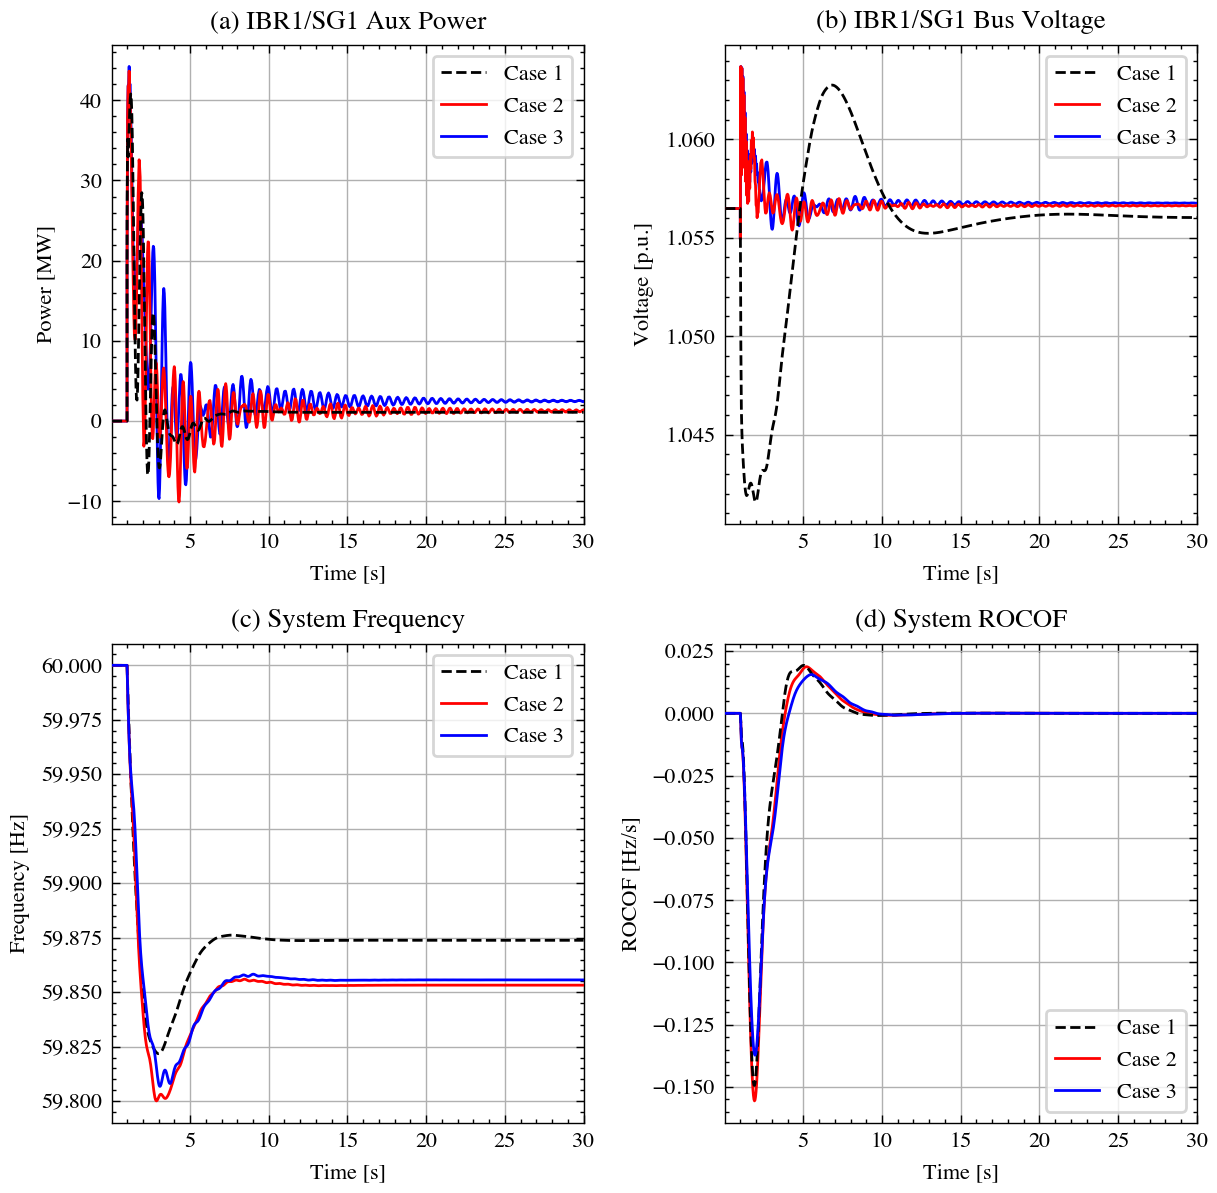

In [36]:
plt.style.use(['default', 'science', 'ieee'])
plt.rcParams['text.usetex'] = False

fig_v, ax_v = plt.subplots(2, 2, figsize=(7, 7), dpi=200)
fig_v.subplots_adjust(wspace=0.3, hspace=0.25)

ax_v[0, 0].plot(sa1.dae.ts.t, paux_case1,
                label='Case 1', zorder=10,
                linestyle='--')
ax_v[0, 0].plot(sa2.dae.ts.t, paux_case2,
                label='Case 2', zorder=9,
                linestyle='-')
ax_v[0, 0].plot(sa3.dae.ts.t, paux_case3,
                label='Case 3', zorder=8,
                linestyle='-')

ax_v[0, 1].plot(sa1.dae.ts.t, v_case1,
                label='Case 1', zorder=10,
                linestyle='--')
ax_v[0, 1].plot(sa2.dae.ts.t, v_case2,
                label='Case 2', zorder=9,
                linestyle='-')
ax_v[0, 1].plot(sa3.dae.ts.t, v_case3,
                label='Case 3', zorder=8,
                linestyle='-')

ax_v[1, 0].plot(sa1.dae.ts.t, omega_case1,
                label='Case 1', linestyle='--',
                zorder=10,)
ax_v[1, 0].plot(sa2.dae.ts.t, omega_case2,
                label='Case 2', linestyle='-',
                zorder=11,)
ax_v[1, 0].plot(sa3.dae.ts.t, omega_case3,
                label='Case 3', linestyle='-',
                zorder=12,)

ax_v[1, 1].plot(sa1.dae.ts.t, rocof_case1,
                label='Case 1', linestyle='--',
                zorder=10,)
ax_v[1, 1].plot(sa2.dae.ts.t, rocof_case2,
                label='Case 2', linestyle='-',
                zorder=9,)
ax_v[1, 1].plot(sa3.dae.ts.t, rocof_case3,
                label='Case 3', linestyle='-',
                zorder=11,)

_ = ax_v[0, 0].set_title('(a) IBR1/SG1 Aux Power')
_ = ax_v[0, 0].set_ylabel('Power [MW]')

_ = ax_v[0, 1].set_title('(b) IBR1/SG1 Bus Voltage')
_ = ax_v[0, 1].set_ylabel('Voltage [p.u.]')

_ = ax_v[1, 0].set_title('(c) System Frequency')
_ = ax_v[1, 0].set_ylabel('Frequency [Hz]')

_ = ax_v[1, 1].set_title('(d) System ROCOF')
_ = ax_v[1, 1].set_ylabel('ROCOF [Hz/s]')

for axes in ax_v.reshape(-1):
    axes.legend(frameon=True)
    axes.grid(True, zorder=0)
    axes.set_xlim([sa1.dae.ts.t[0], sa1.dae.ts.t[-1]])
    axes.set_xlabel('Time [s]')

fig_v.savefig("fig_vis_dyr.eps", format='eps')